In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
from google.colab import files
uploaded = files.upload()

Saving electra_pre_training_text_encoders_as_discriminators_rather_than_generators.pdf to electra_pre_training_text_encoders_as_discriminators_rather_than_generators.pdf


In [ ]:
pd.read_csv('/content/electra_pre_training_text_encoders_as_discriminators_rather_than_generators.pdf')

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade gspread

# Работа с нерепрезентативными данными

In [25]:
import ipywidgets as widgets

slider = widgets.IntSlider(20, min=0, max=100)
slider

IntSlider(value=20)

In [27]:
slider.value

42

In [ ]:
import altair as alt
import ipywidgets as widgets
from vega_datasets import data

source = data.stocks()

stock_picker = widgets.SelectMultiple(
    options=source.symbol.unique(),
    value=list(source.symbol.unique()),
    description='Symbols')

# The value of symbols will come from the stock_picker.
@widgets.interact(symbols=stock_picker)
def render(symbols):
  selected = source[source.symbol.isin(list(symbols))]

  return alt.Chart(selected).mark_line().encode(
      x='date',
      y='price',
      color='symbol',
      strokeDash='symbol',
  )

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/tixonsit/mmdad_materials/master/datasets_14872_228180_Admission_Predict_Ver1.1.csv')
del df['Serial No.']

In [3]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
len(df)

500

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


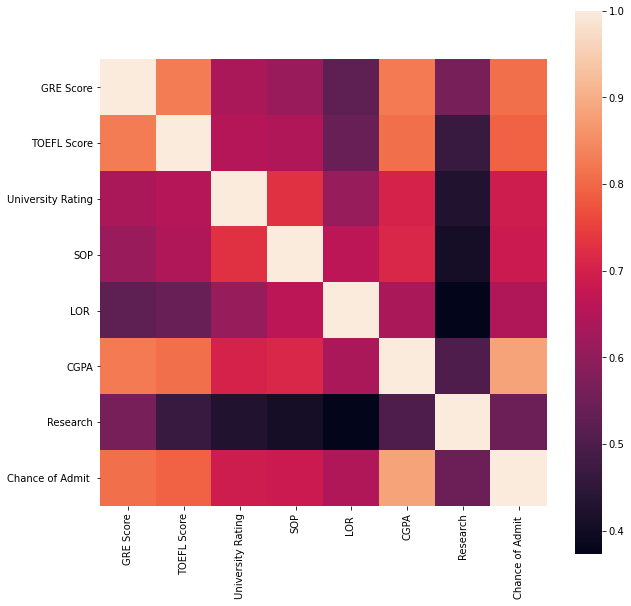

In [ ]:
import seaborn as sns

plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), square=True)
plt.show()

In [ ]:
# перемешка
df = df.sample(frac=1).reset_index(drop=True)
# train test split
df_train = df[:400]
df_test = df[400:]
# среднее и стандартное отклонение
mean = df_train.mean(axis=0)
std = df_test.std(axis=0)
# 0 мат ожидание и 1 дисперсию
df_train = (df_train - mean)/std
X_train = df_train.drop(columns=['Chance of Admit ']).values
y_train = df_train['Chance of Admit '].values
df_test = (df_test - mean)/std
X_test = df_test.drop(columns=['Chance of Admit ']).values
y_test = df_test['Chance of Admit '].values

In [ ]:
X_train[:5]

array([[ 1.09562322,  0.98731299,  0.79367889,  0.66716497, -1.13849908,
         0.33558058,  0.90530038],
       [ 0.6235753 , -0.03625123,  0.79367889, -0.3939324 , -1.13849908,
        -0.16355197,  0.90530038],
       [ 1.47326156,  1.84028318,  1.70333951,  1.72826233,  1.73287312,
         1.83297821,  0.90530038],
       [ 2.03971906,  2.18147125,  0.79367889,  1.72826233,  1.73287312,
         1.86740115,  0.90530038],
       [-0.03729179, -0.37743931, -1.02564235, -0.92448108, -1.13849908,
        -0.64547304,  0.90530038]])

## Нерепрезентативность данных

### Разная перемешка

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [ ]:
# массив результатов
r2_shuffles = []
# проверим, зависит ли изначальная перемешка от результата
for i in range(20):
    # перемешка
    df = df.sample(frac=1).reset_index(drop=True)
    # train test split
    df_train = df[:400]
    df_test = df[400:]
    # среднее и стандартное отклонение
    mean = df_train.mean(axis=0)
    std = df_train.std(axis=0)
    # 0 мат ожидание и 1 дисперсию
    df_train = (df_train - mean)/std
    X_train = df_train.drop(columns=['Chance of Admit ']).values
    y_train = df_train['Chance of Admit '].values
    df_test = (df_test - mean)/std
    X_test = df_test.drop(columns=['Chance of Admit ']).values
    y_test = df_test['Chance of Admit '].values

    alg = Ridge()
    alg.fit(X_train, y_train)
    print(f'Итерация {i+1} | R^2 = ', r2_score(y_test, alg.predict(X_test)))

    r2_shuffles.append(r2_score(y_test, alg.predict(X_test)))

Итерация 1 | R^2 =  0.8728795603202351
Итерация 2 | R^2 =  0.8395070674856886
Итерация 3 | R^2 =  0.8378276954596825
Итерация 4 | R^2 =  0.8373842636124977
Итерация 5 | R^2 =  0.8481746373872383
Итерация 6 | R^2 =  0.7608266191749082
Итерация 7 | R^2 =  0.8017311486213723
Итерация 8 | R^2 =  0.8018134344492712
Итерация 9 | R^2 =  0.7942556269167458
Итерация 10 | R^2 =  0.8313474924472353
Итерация 11 | R^2 =  0.8422499442216831
Итерация 12 | R^2 =  0.805219004435958
Итерация 13 | R^2 =  0.7905725931941305
Итерация 14 | R^2 =  0.7766730434786274
Итерация 15 | R^2 =  0.7675641043615492
Итерация 16 | R^2 =  0.7941344353435149
Итерация 17 | R^2 =  0.8303912795704002
Итерация 18 | R^2 =  0.7751369390159977
Итерация 19 | R^2 =  0.8829472131995805
Итерация 20 | R^2 =  0.8380337222115256


{'boxes': [<matplotlib.lines.Line2D at 0x7fa052c2bd68>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa052bba7b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa052bc4278>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa052bbaeb8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa052bba0b8>,
  <matplotlib.lines.Line2D at 0x7fa052bba438>]}

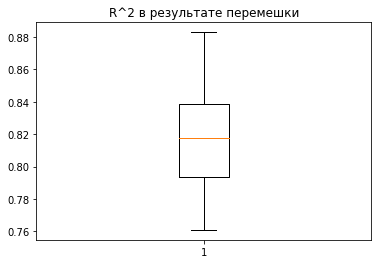

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('R^2 в результате перемешки')
ax1.boxplot(r2_shuffles)

Как еще можно обнаружить, что данных слишком мало? - Кривые обучения
Кроме этого попробуем улучшить картину от недостаточного качества путем создания новых, полиномиальных, признаков

### Кривые обучения

Изменяем размер имеющейся обучающей выборки и смотрим, как качество решения задачи зависит от объема данных, на котором мы обучали модель.Такой подход называется кривыми обучения (sklearn.model_selection.learning_curve).

Алгоритм выполняет перекрестную проверку тренировочных и тестовых показателей для разных размеров учебных наборов. Генератор перекрестной проверки разделяет весь набор данных k раз в данных обучения и теста. Подмножества обучающего набора с различными размерами будут использоваться для обучения оценщика, а для каждого размера обучающего подмножества и набора тестов будут вычисляться баллы. После этого результаты будут усреднены по всем k прогонам для каждого размера подмножества тренировки. 

Таким образом в результате обучения у нас получится значения метрики качества по y и размер выборки по x. На них будет отображены кривые по кросс валидации и обучению.

In [6]:
# отобразим данные и средние значения кривых между ними (так как берем k фолдов)
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fillnp.linspace(0.1, 1, 10)
    plt.feel_between(x, mu - std, mu + std, edgecolor='none', facecolor=lines[0].get_color(), alpha=0.2)

In [ ]:
np.linspace(0.1, 0.9, 9)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

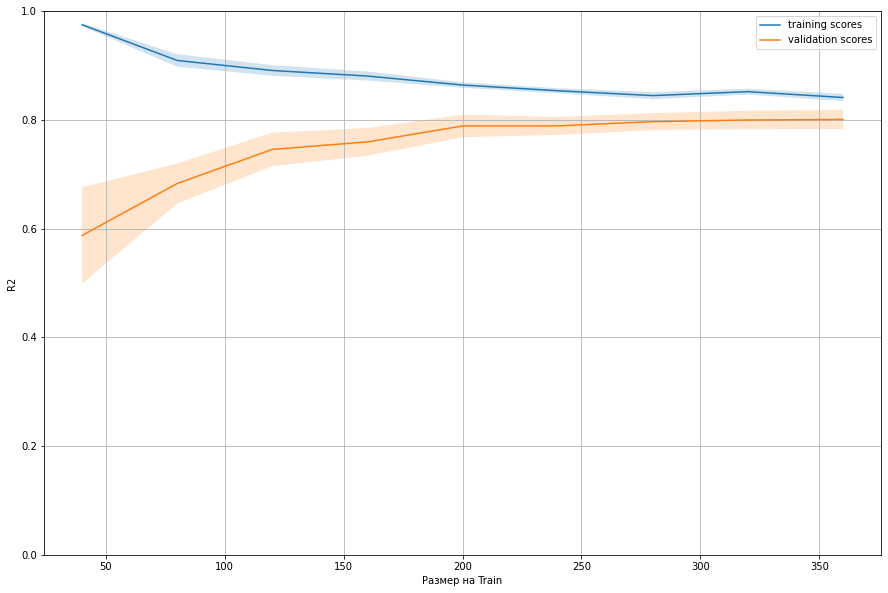

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# перемешка
df = df.sample(frac=1).reset_index(drop=True)
# train test split
df_train = df[:400]
df_test = df[400:]
# среднее и стандартное отклонение
mean = df.mean(axis=0)
std = df.std(axis=0)
# 0 мат ожидание и 1 дисперсию
df_train = (df_train - mean)/std
X_train = df_train.drop(columns=['Chance of Admit ']).values
y_train = df_train['Chance of Admit '].values
df_test = (df_test - mean)/std
X_test = df_test.drop(columns=['Chance of Admit ']).values
y_test = df_test['Chance of Admit '].values

pipe = Pipeline([('scaler', StandardScaler()), # нормализуем
                       ('poly', PolynomialFeatures(degree=2)), # создадим полиномиальных признаков (степень 2)
                       ('alg', Ridge())]) # все та же линейная с ridge регуляризация

N_train, val_train, val_test = learning_curve(pipe,
                                              df.drop(columns=['Chance of Admit ']).values, # X
                                              df['Chance of Admit '].values, # y
                                              train_sizes = np.linspace(0.1, 0.9, 9), # переменный размер обучающей выборки
                                              cv=5, # 5 фолдов кросс вал
                                              scoring='r2') # R2
from matplotlib.pyplot import figure, ylim
figure(figsize=(15, 10))
plt.grid()
ylim(0, 1)
plot_with_err(N_train, val_train, label='training scores')
plot_with_err(N_train, val_test, label='validation scores')
plt.xlabel('Размер на Train')
plt.ylabel('R2')
plt.legend()

* Если две кривые распологаются близко, и обе ошибки велики, — это признак недообучения
* Если две кривые далеко друг от друга — это показатель переобучения, данные нерепрезентативны
* Если кривые еще не сошлись, добавление новых данных может улучшить результат
* Если две кривые далеко друг от друга, — это показатель переобучения


## Аугментация

Мы попробовали аугментировать с помощью sklearn

In [7]:
from imblearn.under_sampling import TomekLinks

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# попробуем создать новые данные на основе пространства признаков
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.7.0)


In [8]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
import seaborn as sns

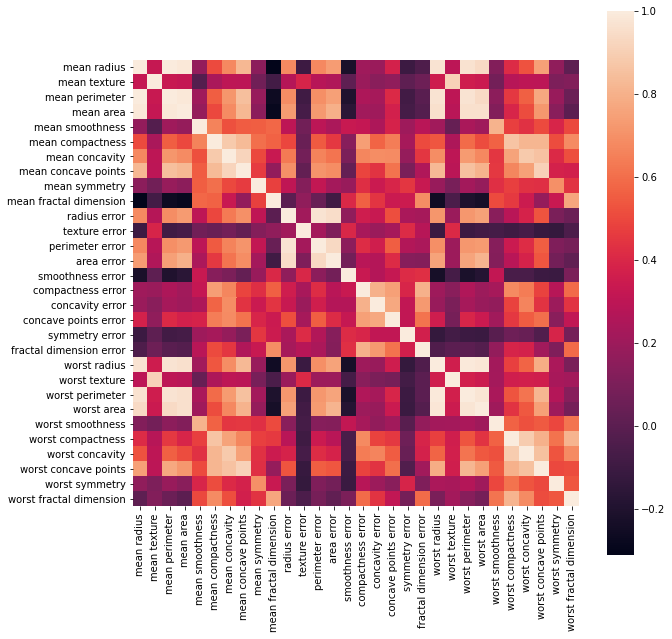

In [12]:
plt.subplots(figsize=(10,10))
sns.heatmap(X.corr(), square=True)
plt.show()

In [13]:
pd.Series(y).value_counts()

1    357
0    212
dtype: int64

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
len(y_test), len(y_train)

(114, 455)

In [17]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(class_weight = 'balanced')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [18]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.97      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



### Over-sampling, Under-sampling

Существуют две стратегии реэмплинга данных:
* добавить данных в меньший класс (undersampling)
* удалить данные из большего класса (oversampling)

В домашнем задании мы как раз удаляли случайным образом данные из большего класса.

![dssmall](https://habrastorage.org/getpro/habr/post_images/ef1/7fd/7b5/ef17fd7b511aa0ae67d398b3205068b8.png)

### Under-sampling

#### TomekLinks

Пусть примеры $E_i$ и $E_j$ принадлежат к различным классам, $d(Ei,Ej)$ – расстояние между указанными примерами. Пара $(Ei,Ej)$ называется связью Томека, если не найдется ни одного примера $E_l$ такого, что будет справедлива совокупность неравенств:

$$\begin{cases}
{d(E_i, E_l)< d(E_i, E_j)}\\
{d(E_j, E_l)< d(E_i, E_j)}
\end{cases}
$$

Согласно данному подходу, все мажоритарные записи, входящие в связи Томека, должны быть удалены из набора данных. Этот способ хорошо удаляет записи, которые можно рассматривать в качестве «зашумляющих».


![dssmall](https://habrastorage.org/getpro/habr/post_images/39c/0f9/4cb/39c0f94cbe7ea3162713d0b00fac912b.png)

In [ ]:
type(y_train)

numpy.ndarray

In [19]:
from imblearn.under_sampling import TomekLinks

augm = TomekLinks(sampling_strategy='majority')
X_train_augm, y_train_augm = augm.fit_resample(np.array(X_train), np.array(y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [20]:
pd.Series(y_train_augm).value_counts()

1    272
0    170
dtype: int64

In [21]:
clf = LogisticRegression(class_weight = 'balanced')

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train_augm, y_train_augm)

predictions = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Oversamplitng

#### SMOTE ADASYN

![](https://hsto.org/getpro/habr/post_images/c57/e7e/f4f/c57e7ef4f8711ad2eda881651a027867.png)

Эта стратегия основана на идее генерации некоторого количества искусственных примеров, которые были бы «похожи» на имеющиеся в миноритарном классе, но при этом не дублировали их. Для создания новой записи находят разность $$d = X_b – X_a$$, где $X_a$,$X_b$ – векторы признаков «соседних» примеров $a$ и $b$ из миноритарного класса. Их находят, используя алгоритм ближайшего соседа (KNN). В данном случае необходимо и достаточно для примера $b$ получить набор из $k$ соседей, из которого в дальнейшем будет выбрана запись $b$. Остальные шаги алгоритма KNN не требуются.

Далее из $d$ путем умножения каждого его элемента на случайное число в интервале (0, 1) получают $\widehat{d}$. Вектор признаков нового примера вычисляется путем сложения $X_a$ и $\widehat{d}$. Алгоритм SMOTE позволяет задавать количество записей, которое необходимо искусственно сгенерировать. Степень сходства примеров $a$ и $b$ можно регулировать путем изменения значения $k$ (числа ближайших соседей). На рисунке схематично изображено то, как в двумерном пространстве признаков могут располагаться искусственно сгенерированные примеры.

![dssmall](https://basegroup.ru/sites/default/files/article_img/smote.gif)

Данный подход имеет недостаток в том, что «вслепую» увеличивает плотность примерами в области слабо представленного класса. В случае, если миноритарные примеры равномерно распределены среди мажоритарных и имеют низкую плотность, алгоритм SMOTE только сильнее перемешает классы.

![dssmall](https://basegroup.ru/sites/default/files/article_img/smote_overgeneralization.gif)

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

augm = ADASYN()
X_train_augm, y_train_augm = augm.fit_resample(np.array(X_train), np.array(y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


NameError: ignored

In [ ]:
pd.Series(y_train).value_counts()

1    285
0    170
dtype: int64

In [ ]:
pd.Series(y_train_augm).value_counts()

0    293
1    285
dtype: int64

In [ ]:
clf = LogisticRegression()

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train_augm, y_train_augm)

predictions = clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



На основе https://www.kaggle.com/jessicali9530/kuc-hackathon-winter-2018

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tixonsit/mmdad_materials/master/drugsComTest_raw.csv')

In [ ]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [ ]:
del df['uniqueID']

In [ ]:
del df['date']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   drugName     53766 non-null  object
 1   condition    53471 non-null  object
 2   review       53766 non-null  object
 3   rating       53766 non-null  int64 
 4   usefulCount  53766 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.1+ MB


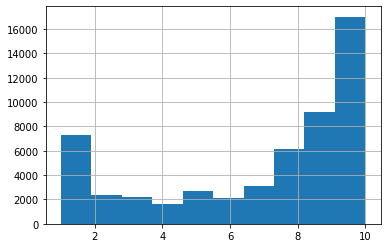

In [ ]:
df['rating'].hist()

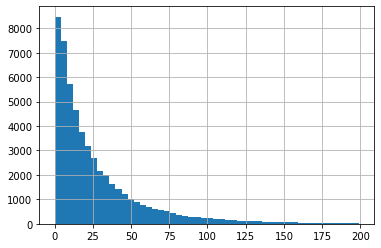

In [ ]:
df['usefulCount'][df['usefulCount'] < 200].hist(bins = 50)

In [ ]:
len(df)

53766

# Пайплайн обработки

## Загрузка данных

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tixonsit/mmdad_materials/master/datasets_33180_43520_heart%20(1).csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
len(df)

303

In [ ]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

## Полиномиальные признаки

In [ ]:
# нормализация
def normalize(df, df_type = 'train', mean = None, std = None):
    if df_type == 'train':
        X_train = df.drop(columns=['target']).values
        y_train = df['target'].values

        mean = X_train.mean(axis=0)
        std = X_train.std(axis=0)

        X_train = (X_train - mean)/std

        return X_train, y_train, mean, std
    else:
        X_train = df.drop(columns=['target']).values
        y_train = df['target'].values

        return (X_train - mean)/std, y_train, mean, std

In [ ]:
train_size = 0.8

# перемешка
df = df.sample(frac=1).reset_index(drop=True)

X_train, y_train, mean, std = normalize(df[:int(train_size*len(df))])
X_test, y_test, mean, std = normalize(df[int(train_size*len(df)):], df_type = 'test', mean = mean, std = std)

In [ ]:
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [ ]:
y_train.shape, y_test.shape

((242,), (61,))

In [ ]:
X_train

array([[-0.45614775,  0.70272837, -0.94684177, ..., -0.67505958,
        -0.70546105,  1.10935703],
       [-1.40594679,  0.70272837,  0.01997556, ...,  0.9585846 ,
        -0.70546105, -0.53766384],
       [ 0.81025097, -1.42302495, -0.94684177, ..., -2.30870375,
         2.17186886,  1.10935703],
       ...,
       [-0.13954807, -1.42302495,  0.9867929 , ...,  0.9585846 ,
        -0.70546105, -3.83170558],
       [-0.03401484,  0.70272837, -0.94684177, ...,  0.9585846 ,
        -0.70546105, -0.53766384],
       [-1.08934711,  0.70272837,  0.9867929 , ...,  0.9585846 ,
        -0.70546105, -0.53766384]])

## Создание полиномиальных

In [ ]:
def create_polinomial(X, degree = 2):
    return PolynomialFeatures(degree).fit_transform(X)

In [ ]:
X_train = create_polinomial(X_train, 2)
X_test = create_polinomial(X_test, 2)

In [ ]:
X_train.shape, X_test.shape

((242, 105), (61, 105))

## Аугментация

In [ ]:
def oversample_data(X, y):
    return ADASYN(sampling_strategy='minority').fit_resample(np.array(X), np.array(y))

In [ ]:
def undersample_data(X, y):
    return TomekLinks().fit_resample(np.array(X), np.array(y))

In [ ]:
def augment_data(X, y):
    try:
        X, y = oversample_data(X, y)
    except:
        pass
    # try:
    #     X, y = undersample_data(X, y)
    # except:
    #     pass
    return X, y

In [ ]:
X_train, y_train = augment_data(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train.shape, y_train.shape

((258, 105), (258,))

## Алгоритмы

In [ ]:
from sklearn.svm import SVC

In [ ]:
alg = SVC()

grid = {'C': np.array(np.linspace(-5, 5, 10), dtype='float'),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        }

gs = GridSearchCV(alg, grid, verbose=2, n_jobs = -1, scoring = 'f1')
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.8s finished


({'C': 0.5555555555555554, 'kernel': 'sigmoid'}, 0.8266937131279004)

In [ ]:
alg = SVC(C =  0.55, kernel = 'sigmoid')
alg.fit(X_train, y_train)
preds = alg.predict(X_test)

In [ ]:
from sklearn import metrics

print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        33
           1       0.74      0.93      0.83        28

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.84      0.82      0.82        61



## Оценка репрезентативности данных

In [ ]:
results = []

for i in range(20):
    train_size = 0.8
    # перемешка
    df = df.sample(frac=1).reset_index(drop=True)
    # нормализация
    X_train, y_train, mean, std = normalize(df[:int(train_size*len(df))])
    X_test, y_test, mean, std = normalize(df[int(train_size*len(df)):], df_type = 'test', mean = mean, std = std)
    # полиномиальные
    X_train = create_polinomial(X_train, 2)
    X_test = create_polinomial(X_test, 2)  
    # аугментация
    X_train, y_train = augment_data(X_train, y_train)
    # алгоритмы
    alg = SVC()
    grid = {'C': np.array(np.linspace(-5, 5, 10), dtype='float'),
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            }

    gs = GridSearchCV(alg, grid, n_jobs = -1, scoring = 'f1')
    gs.fit(X_train, y_train)
    
    print(gs.best_score_)
    results.append(gs.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.8365244924566959


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.8077738969801758


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.8385186386613684


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.8597255941495202


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.8310045510045511


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.7889447685752542


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.8378467027106551


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.838269764874112


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.8367819867515547


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.7988224267599674


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.8117529165248726


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.8060373081244225


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.803559150665176


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.8082759438107189


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.8132585653340371


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.8163037361091972


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.8205848910923799


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.8197865353037767


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.8124497645948331


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.7898922752124722


{'boxes': [<matplotlib.lines.Line2D at 0x7fa04b6b20f0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa04b6b2940>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa04b6ce908>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa04b6ce828>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa04b6b29b0>,
  <matplotlib.lines.Line2D at 0x7fa04b6b24a8>]}

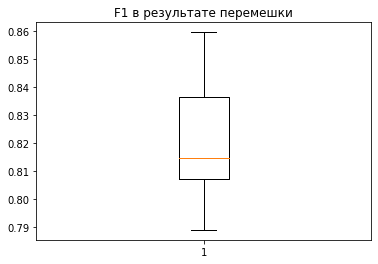

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('F1 в результате перемешки')
ax1.boxplot(results)

## Кривые обучения

In [ ]:
# отобразим данные и средние значения кривых между ними (так как берем k фолдов)
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
    facecolor=lines[0].get_color(), alpha=0.2)

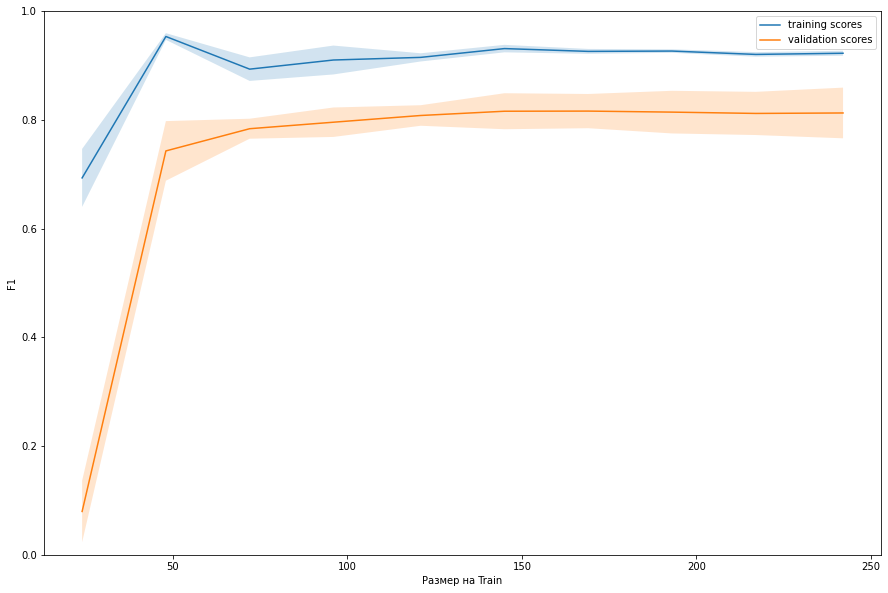

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pipe = Pipeline([('scaler', StandardScaler()), # нормализуем
                 ('poly', PolynomialFeatures(degree=3)), # создадим полиномиальных признаков (степень 2)
                 ('alg', SVC())]) # svm

N_train, val_train, val_test = learning_curve(pipe,
                                              df.drop(columns=['target']).values, # X
                                              df['target'].values, # y
                                              train_sizes = np.linspace(0.1, 1, 10), # переменный размер обучающей выборки
                                              cv=5, # 5 фолдов кросс вал
                                              scoring='f1') # R2

from matplotlib.pyplot import figure, ylim
figure(figsize=(15, 10))

ylim(0, 1)
plot_with_err(N_train, val_train, label='training scores')
plot_with_err(N_train, val_test, label='validation scores')
plt.xlabel('Размер на Train')
plt.ylabel('F1')
plt.legend()